<a href="https://colab.research.google.com/github/anushirahatti/mit/blob/master/covid_inpatient_cases_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA 
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, RandomOverSampler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
inpatient_cases_data = pd.read_csv("https://raw.githubusercontent.com/anushirahatti/mit/master/inpatient_cases_data_updated.csv")

# Exploratory Data Analysis (EDA)

In [3]:
inpatient_cases_data.shape

(73, 61)

In [4]:
inpatient_cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Gender                                             73 non-null     object 
 1   Age                                                73 non-null     int64  
 2   Clinical classification                            73 non-null     object 
 3   Comorbidities                                      73 non-null     object 
 4   Cardiovascular and cerebrovascular disease         73 non-null     object 
 5    Endocrine system disease                          73 non-null     object 
 6   Malignant tumor                                    73 non-null     object 
 7   Respiratory system disease                         73 non-null     object 
 8   Digestive system disease                           73 non-null     object 
 9   Renal diseas

In [5]:
inpatient_cases_data.head()

,Gender,Age,Clinical classification,Comorbidities,Cardiovascular and cerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Other Signs and Symptoms,Clinical outcome,COVID-19 RNA clearance,Chest CT findings at discharge,Course of lopinavir-ritonavir,Course of arbidol,Days from onset of symptoms to hospital admission,Fever Disappearance time,Cough Disappearance time,Chest Tightness Disappearance time,Fatigue Disappearance time,Diarrhea Disappearance time,Other Symptoms Disappearance time,Hospital stay,The time of nucleic acid turning negative,White Blood Cell Count Day 1_2,Neutrophil count Day 1_2,Lymphocyte count Day 1_2,Monocyte count Day 1_2,CRP Day 1_2,PCT Day 1_2,White Blood Cell Count 3_5,Neutrophil count 3_5,Lymphocyte count 3_5,Monocyte count 3_5,CRP 3_5,PCT 3_5,White Blood Cell Count 6_10,Neutrophil count 6_10,Lymphocyte count 6_10,Monocyte count 6_10,CRP 6_10,PCT 6_10,White Blood Cell Count 10_15,Neutrophil count 10_15,Lymphocyte count 10_15,Monocyte count 10_15,CRP 10_15,PCT 10_15,White Blood Cell Count 15_25,Neutrophil count 15_25,Lymphocyte count 15_25,Monocyte count 15_25,CRP 15_25,PCT 15_25
0,Male,47,Heavy,N,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",N,Advances,6,2.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,0.78,0.79,0.12,8.4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,7.55,6.57,0.39,0.54,108.7,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,53,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,Y,Absorption,2,4.0,13,1.0,5.0,5.0,NaN,NaN,NaN,6.0,7.0,8.25,5.26,2.15,0.68,8.5,0.02,NaN,NaN,NaN,NaN,NaN,NaN,4.90,3.33,1.03,0.40,6.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,57,Ordinary,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,Y,No change,4,4.0,13,1.0,1.0,NaN,NaN,NaN,NaN,8.0,3.0,4.11,1.91,1.68,0.40,3.1,0.02,NaN,NaN,NaN,NaN,NaN,NaN,3.69,1.90,1.37,0.28,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,58,Heavy,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",N,Advances,4,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,1.70,1.30,0.22,16.1,0.04,1.50,1.10,0.40,0.03,2.7,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,54,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,Y,Absorption,5,5.0,10,0.0,2.0,2.0,NaN,NaN,NaN,5.0,4.0,3.03,2.41,0.54,0.07,6.4,0.04,10.05,8.64,0.84,0.56,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
inpatient_cases_data.describe()

,Age,Course of lopinavir-ritonavir,Course of arbidol,Days from onset of symptoms to hospital admission,Fever Disappearance time,Cough Disappearance time,Chest Tightness Disappearance time,Fatigue Disappearance time,Diarrhea Disappearance time,Other Symptoms Disappearance time,Hospital stay,The time of nucleic acid turning negative,White Blood Cell Count Day 1_2,Neutrophil count Day 1_2,Lymphocyte count Day 1_2,Monocyte count Day 1_2,CRP Day 1_2,PCT Day 1_2,White Blood Cell Count 3_5,Neutrophil count 3_5,Lymphocyte count 3_5,Monocyte count 3_5,CRP 3_5,PCT 3_5,White Blood Cell Count 6_10,Neutrophil count 6_10,Lymphocyte count 6_10,Monocyte count 6_10,CRP 6_10,PCT 6_10,White Blood Cell Count 10_15,Neutrophil count 10_15,Lymphocyte count 10_15,Monocyte count 10_15,CRP 10_15,PCT 10_15,White Blood Cell Count 15_25,Lymphocyte count 15_25,Monocyte count 15_25,CRP 15_25,PCT 15_25
count,73.000000,73.000000,39.000000,73.000000,52.000000,52.000000,19.000000,8.000000,7.000000,9.000000,69.000000,69.000000,68.000000,68.000000,68.000000,68.000000,66.000000,61.000000,36.000000,36.000000,36.000000,34.000000,34.000000,25.000000,46.000000,46.000000,46.000000,38.000000,41.000000,25.000000,35.000000,35.000000,35.000000,30.000000,31.000000,19.000000,22.000000,22.000000,22.000000,21.000000,16.000000
mean,55.671233,8.972603,9.794872,10.260274,3.038462,7.961538,10.947368,6.125000,8.714286,6.444444,15.188406,10.739130,5.612647,3.808824,1.302206,0.411176,32.989394,0.128852,5.465833,3.828056,1.080833,0.448824,29.873529,0.044000,6.392174,4.486957,1.318043,0.487895,15.180488,0.099600,6.743714,4.728000,1.394857,0.502667,19.367742,0.196842,6.286818,1.343636,0.479091,13.514286,0.116250
std,15.136467,3.958018,4.072885,7.514851,3.067614,5.674026,8.449022,3.642507,11.571723,3.711843,8.430120,8.284735,2.195464,1.944992,0.659167,0.233810,41.750796,0.494605,2.147507,2.112148,0.453717,0.257397,32.101159,0.027538,2.372000,2.501514,0.609957,0.228948,18.816365,0.242375,2.758917,2.809691,0.523991,0.177355,36.032572,0.640825,2.021215,0.515461,0.186647,19.181639,0.334642
min,21.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.700000,0.480000,0.280000,0.010000,0.500000,0.020000,1.500000,1.100000,0.150000,0.030000,1.000000,0.020000,2.970000,1.000000,0.300000,0.040000,0.200000,0.020000,2.970000,1.410000,0.140000,0.210000,0.500000,0.020000,2.910000,0.540000,0.260000,1.400000,0.020000
25%,46.000000,6.000000,6.000000,4.000000,1.000000,3.750000,4.500000,4.500000,2.500000,3.000000,8.000000,4.000000,4.230000,2.397500,0.872500,0.247500,4.700000,0.020000,3.975000,2.207500,0.797500,0.252500,2.925000,0.020000,4.855000,3.022500,0.835000,0.330000,2.700000,0.020000,5.320000,3.210000,1.095000,0.410000,3.150000,0.020000,5.257500,0.847500,0.352500,2.800000,0.020000
50%,57.000000,9.000000,10.000000,9.000000,2.000000,6.000000,10.000000,5.000000,4.000000,6.000000,13.000000,8.000000,5.070000,3.650000,1.175000,0.410000,12.900000,0.040000,4.765000,3.170000,1.030000,0.395000,14.750000,0.040000,6.000000,3.720000,1.320000,0.490000,11.000000,0.040000,5.890000,3.900000,1.310000,0.465000,7.000000,0.050000,5.750000,1.390000,0.450000,4.100000,0.030000
75%,68.000000,12.000000,12.500000,14.000000,5.000000,12.250000,14.000000,7.000000,8.500000,8.000000,22.000000,16.000000,6.630000,4.492500,1.685000,0.525000,51.850000,0.060000,6.305000,4.877500,1.302500,0.567500,43.800000,0.050000,7.487500,5.312500,1.700000,0.557500,21.700000,0.060000,7.570000,5.430000,1.640000,0.580000,18.450000,0.060000,6.945000,1.747500,0.542500,14.300000,0.050000
max,87.000000,18.000000,21.000000,40.000000,13.000000,27.000000,33.000000,13.000000,34.000000,12.000000,36.000000,34.000000,14.200000,11.880000,3.400000,1.330000,173.300000,3.860000,11.130000,9.650000,2.500000,1.060000,102.600000,0.140000,13.670000,11.720000,2.850000,1.110000,108.700000,1.250000,16.620000,14.620000,2.850000,1.010000,198.900000,2.840000,11.460000,2.420000,1.090000,82.600000,1.370000


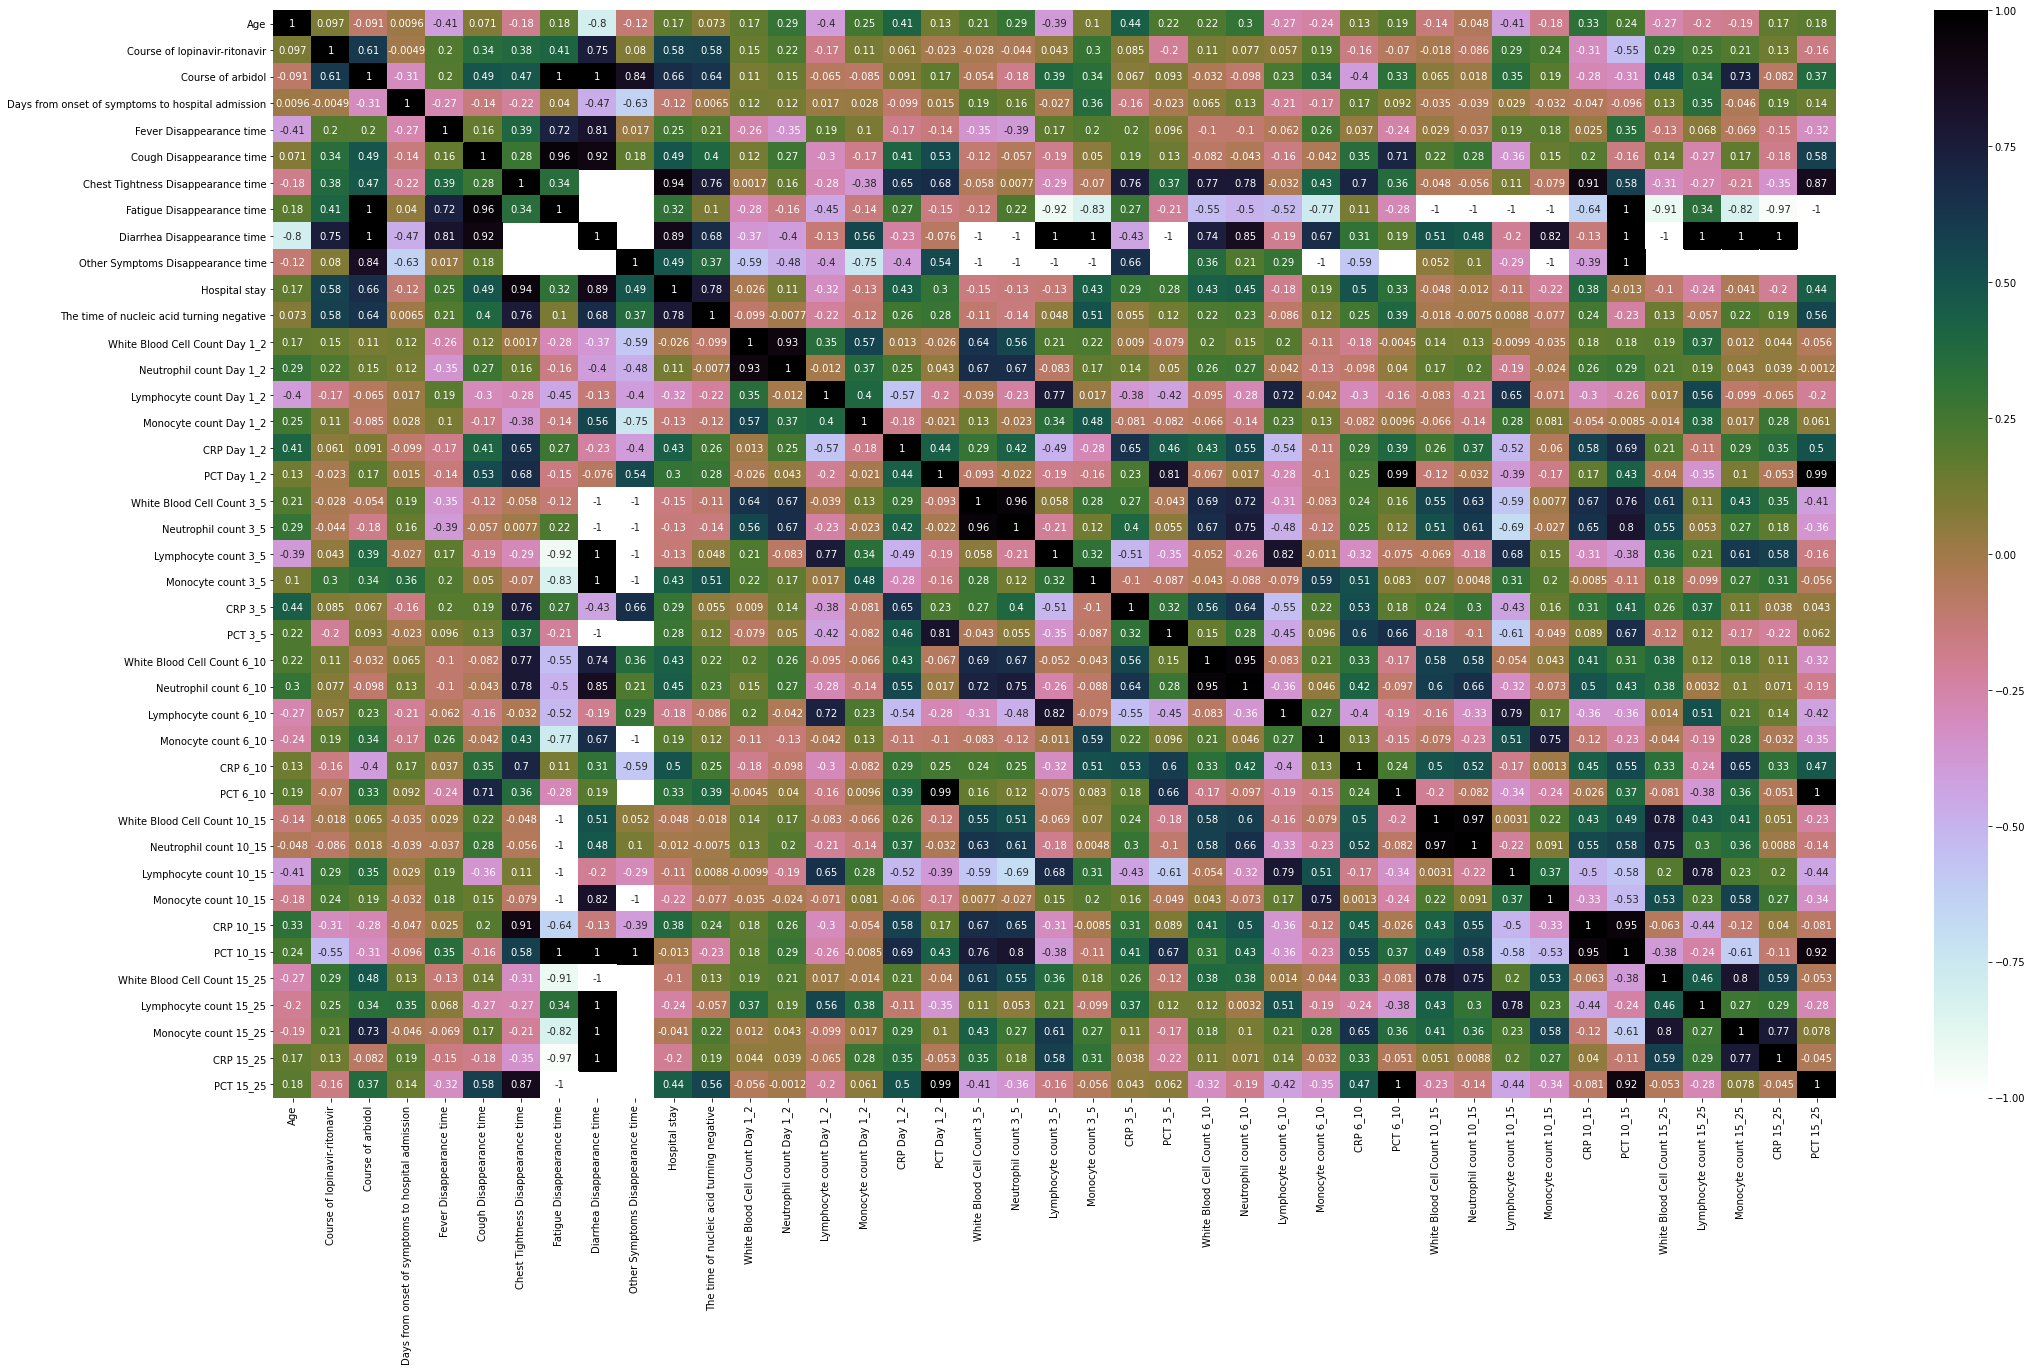

In [7]:
#Heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(inpatient_cases_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

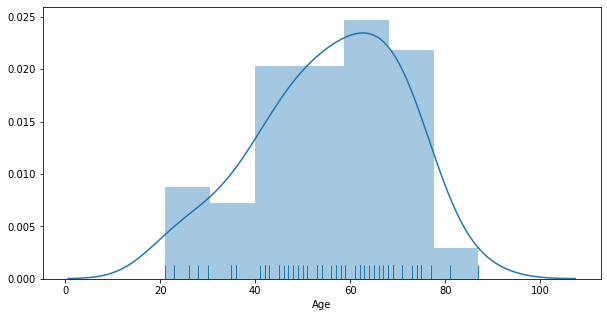

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(a=inpatient_cases_data["Age"],rug=True)

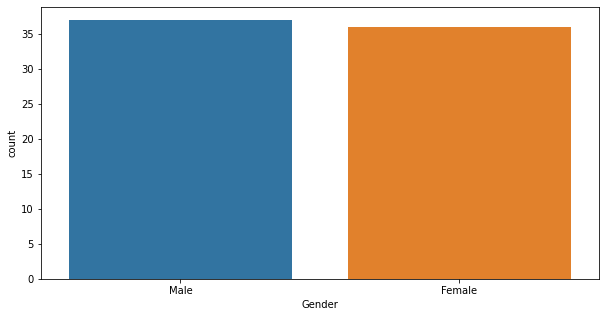

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x="Gender", data=inpatient_cases_data)

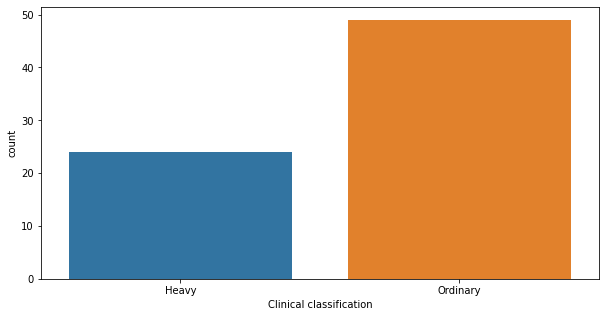

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="Clinical classification", data=inpatient_cases_data)

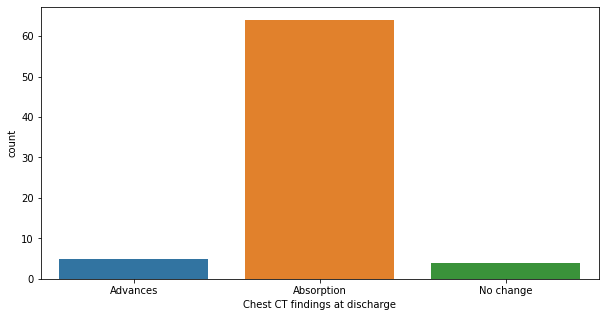

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="Chest CT findings at discharge", data=inpatient_cases_data)

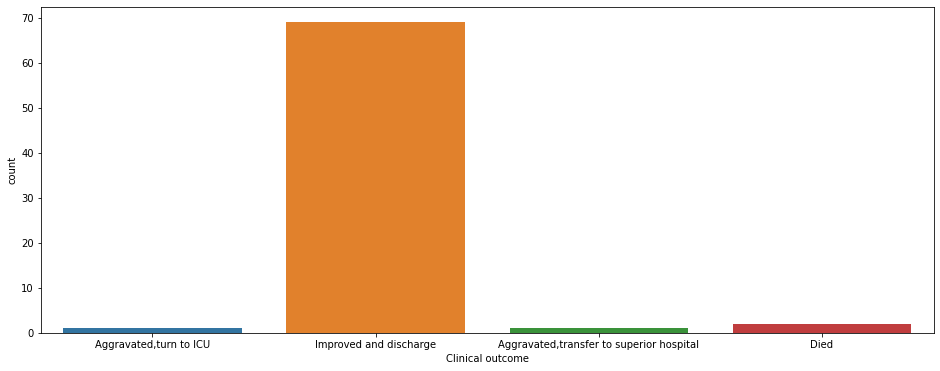

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x="Clinical outcome", data=inpatient_cases_data)

# Data Preprocessing

In [13]:
print(inpatient_cases_data.columns)

Index(['Gender', 'Age', 'Clinical classification', 'Comorbidities',
       'Cardiovascular and cerebrovascular disease',
       ' Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness',
       'Fatigue', 'Diarrhea', 'Other Signs and Symptoms', 'Clinical outcome',
       'COVID-19 RNA clearance', 'Chest CT findings at discharge',
       'Course of lopinavir-ritonavir', 'Course of arbidol',
       'Days from onset of symptoms to hospital admission',
       'Fever Disappearance time', 'Cough Disappearance time',
       'Chest Tightness Disappearance time', 'Fatigue Disappearance time',
       'Diarrhea Disappearance time', 'Other Symptoms Disappearance time',
       'Hospital stay', 'The time of nucleic acid turning negative',
       'White Blood Cell Count Day 1_2', 'Neutrophil count Day 1_2',
       'Lymphocyte count Day 1_2', 'Monocyte count Day 1_2', 'CR

In [14]:
inpatient_cases_data.columns = inpatient_cases_data.columns.str.strip()
inpatient_cases_data.columns.tolist()

['Gender',
 'Age',
 'Clinical classification',
 'Comorbidities',
 'Cardiovascular and cerebrovascular disease',
 'Endocrine system disease',
 'Malignant tumor',
 'Respiratory system disease',
 'Digestive system disease',
 'Renal disease',
 'Liver disease',
 'Fever',
 'Cough',
 'Chest tightness',
 'Fatigue',
 'Diarrhea',
 'Other Signs and Symptoms',
 'Clinical outcome',
 'COVID-19 RNA clearance',
 'Chest CT findings at discharge',
 'Course of lopinavir-ritonavir',
 'Course of arbidol',
 'Days from onset of symptoms to hospital admission',
 'Fever Disappearance time',
 'Cough Disappearance time',
 'Chest Tightness Disappearance time',
 'Fatigue Disappearance time',
 'Diarrhea Disappearance time',
 'Other Symptoms Disappearance time',
 'Hospital stay',
 'The time of nucleic acid turning negative',
 'White Blood Cell Count Day 1_2',
 'Neutrophil count Day 1_2',
 'Lymphocyte count Day 1_2',
 'Monocyte count Day 1_2',
 'CRP Day 1_2',
 'PCT Day 1_2',
 'White Blood Cell Count 3_5',
 'Neutrophi

In [15]:
inpatient_cases_data.applymap(lambda x: x.strip() if type(x)==str else x)

,Gender,Age,Clinical classification,Comorbidities,Cardiovascular and cerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Other Signs and Symptoms,Clinical outcome,COVID-19 RNA clearance,Chest CT findings at discharge,Course of lopinavir-ritonavir,Course of arbidol,Days from onset of symptoms to hospital admission,Fever Disappearance time,Cough Disappearance time,Chest Tightness Disappearance time,Fatigue Disappearance time,Diarrhea Disappearance time,Other Symptoms Disappearance time,Hospital stay,The time of nucleic acid turning negative,White Blood Cell Count Day 1_2,Neutrophil count Day 1_2,Lymphocyte count Day 1_2,Monocyte count Day 1_2,CRP Day 1_2,PCT Day 1_2,White Blood Cell Count 3_5,Neutrophil count 3_5,Lymphocyte count 3_5,Monocyte count 3_5,CRP 3_5,PCT 3_5,White Blood Cell Count 6_10,Neutrophil count 6_10,Lymphocyte count 6_10,Monocyte count 6_10,CRP 6_10,PCT 6_10,White Blood Cell Count 10_15,Neutrophil count 10_15,Lymphocyte count 10_15,Monocyte count 10_15,CRP 10_15,PCT 10_15,White Blood Cell Count 15_25,Neutrophil count 15_25,Lymphocyte count 15_25,Monocyte count 15_25,CRP 15_25,PCT 15_25
0,Male,47,Heavy,N,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",N,Advances,6,2.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,0.78,0.79,0.12,8.4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,7.55,6.57,0.39,0.54,108.7,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,53,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,Y,Absorption,2,4.0,13,1.0,5.0,5.0,NaN,NaN,NaN,6.0,7.0,8.25,5.26,2.15,0.68,8.5,0.02,NaN,NaN,NaN,NaN,NaN,NaN,4.90,3.33,1.03,0.40,6.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,57,Ordinary,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,Y,No change,4,4.0,13,1.0,1.0,NaN,NaN,NaN,NaN,8.0,3.0,4.11,1.91,1.68,0.40,3.1,0.02,NaN,NaN,NaN,NaN,NaN,NaN,3.69,1.90,1.37,0.28,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,58,Heavy,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",N,Advances,4,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,1.70,1.30,0.22,16.1,0.04,1.50,1.10,0.40,0.03,2.7,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,54,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,Y,Absorption,5,5.0,10,0.0,2.0,2.0,NaN,NaN,NaN,5.0,4.0,3.03,2.41,0.54,0.07,6.4,0.04,10.05,8.64,0.84,0.56,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Female,30,Ordinary,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,Y,Absorption,13,NaN,13,5.0,16.0,NaN,NaN,NaN,NaN,24.0,20.0,6.75,3.86,2.27,0.44,1.3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,6.92,3.75,2.37,0.55,1.5,0.02,7.68,4.68,2.18,0.56,2.7,0.02,6.39,3.81,1.93,0.41,1.8,0.02
69,Female,59,Ordinary,Y,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,Improved and discharge,Y,Absorption,12,NaN,10,NaN,15.0,NaN,13.0,NaN,NaN,16.0,12.0,3.81,2.90,0.55,0.27,41.7,0.04,4.03,2.90,0.69,0.31,5.3,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,2.74,0.74,0.35,1.9,0.02
70,Female,87,Ordinary,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,Improved and discharge,Y,Absorption,10,NaN,10,NaN,13.0,NaN,NaN,NaN,NaN,14.0,4.0,7.65,5.48,1.32,0.64,25.0,0.03,NaN,NaN,NaN,NaN,NaN,0.02,8.08,5.37,2.04,0.54,23.8,NaN,9.21,6.21,2.15,0.57,2.7,0.02,NaN,NaN,NaN,NaN,NaN,NaN
71,Female,56,Ordinary,Y,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,Y,Absorption,9,NaN,20,3.0,6.0,NaN,NaN,NaN,NaN,12.0,10.0,5.01,3.07,1.36,0.47,1.4,0.02,6.02,3.74,1.66,0.58,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Binning age

def age_group(x):
    if int(x) >= 0 and int(x) < 18:
        x = "Children"
    elif int(x) >= 18 and int(x) < 26:
        x = 'Young Adults'
    elif int(x) >= 26 and int(x) < 41:
        x = 'Adults'
    elif int(x) >= 41 and int(x) < 61:
        x = 'Middle Aged Adults'
    elif int(x) >= 61:
        x = 'Old Adults'
    return x
inpatient_cases_data['Age Group'] = inpatient_cases_data.Age.apply(age_group)

In [0]:
clmn = ['Age Group', 
 'Gender', 
 'Clinical classification', 
 'Comorbidities',
 'Cardiovascular and cerebrovascular disease',
 'Endocrine system disease',
 'Malignant tumor',
 'Respiratory system disease',
 'Digestive system disease',
 'Renal disease',
 'Liver disease',
 'Fever',
 'Cough',
 'Chest tightness',
 'Fatigue',
 'Diarrhea',
 'Other Signs and Symptoms',
 'Clinical outcome',
 'COVID-19 RNA clearance',
 'Chest CT findings at discharge']

inpatient_cases_data_apriori = inpatient_cases_data[clmn]
inpatient_cases_data_pred = inpatient_cases_data.drop(['Age Group'], axis=1)

In [0]:
#inpatient_cases_data_pred['Clinical outcome'] = inpatient_cases_data_pred['Clinical outcome'].map({'Improved and discharge': 1,'Aggravated,transfer to superior hospital': 2, 'Aggravated,turn to ICU': 3, 'Died': 4})

In [0]:
X = inpatient_cases_data_pred.drop(['Clinical outcome'], axis=1)
y = inpatient_cases_data_pred['Clinical outcome']

In [20]:
X.columns

Index(['Gender', 'Age', 'Clinical classification', 'Comorbidities',
       'Cardiovascular and cerebrovascular disease',
       'Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness',
       'Fatigue', 'Diarrhea', 'Other Signs and Symptoms',
       'COVID-19 RNA clearance', 'Chest CT findings at discharge',
       'Course of lopinavir-ritonavir', 'Course of arbidol',
       'Days from onset of symptoms to hospital admission',
       'Fever Disappearance time', 'Cough Disappearance time',
       'Chest Tightness Disappearance time', 'Fatigue Disappearance time',
       'Diarrhea Disappearance time', 'Other Symptoms Disappearance time',
       'Hospital stay', 'The time of nucleic acid turning negative',
       'White Blood Cell Count Day 1_2', 'Neutrophil count Day 1_2',
       'Lymphocyte count Day 1_2', 'Monocyte count Day 1_2', 'CRP Day 1_2',
       'P

In [21]:
X

,Gender,Age,Clinical classification,Comorbidities,Cardiovascular and cerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Other Signs and Symptoms,COVID-19 RNA clearance,Chest CT findings at discharge,Course of lopinavir-ritonavir,Course of arbidol,Days from onset of symptoms to hospital admission,Fever Disappearance time,Cough Disappearance time,Chest Tightness Disappearance time,Fatigue Disappearance time,Diarrhea Disappearance time,Other Symptoms Disappearance time,Hospital stay,The time of nucleic acid turning negative,White Blood Cell Count Day 1_2,Neutrophil count Day 1_2,Lymphocyte count Day 1_2,Monocyte count Day 1_2,CRP Day 1_2,PCT Day 1_2,White Blood Cell Count 3_5,Neutrophil count 3_5,Lymphocyte count 3_5,Monocyte count 3_5,CRP 3_5,PCT 3_5,White Blood Cell Count 6_10,Neutrophil count 6_10,Lymphocyte count 6_10,Monocyte count 6_10,CRP 6_10,PCT 6_10,White Blood Cell Count 10_15,Neutrophil count 10_15,Lymphocyte count 10_15,Monocyte count 10_15,CRP 10_15,PCT 10_15,White Blood Cell Count 15_25,Neutrophil count 15_25,Lymphocyte count 15_25,Monocyte count 15_25,CRP 15_25,PCT 15_25
0,Male,47,Heavy,N,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,N,Advances,6,2.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,0.78,0.79,0.12,8.4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,7.55,6.57,0.39,0.54,108.7,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,53,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Y,Absorption,2,4.0,13,1.0,5.0,5.0,NaN,NaN,NaN,6.0,7.0,8.25,5.26,2.15,0.68,8.5,0.02,NaN,NaN,NaN,NaN,NaN,NaN,4.90,3.33,1.03,0.40,6.0,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,57,Ordinary,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,No change,4,4.0,13,1.0,1.0,NaN,NaN,NaN,NaN,8.0,3.0,4.11,1.91,1.68,0.40,3.1,0.02,NaN,NaN,NaN,NaN,NaN,NaN,3.69,1.90,1.37,0.28,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,58,Heavy,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Advances,4,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,1.70,1.30,0.22,16.1,0.04,1.50,1.10,0.40,0.03,2.7,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,54,Ordinary,N,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Y,Absorption,5,5.0,10,0.0,2.0,2.0,NaN,NaN,NaN,5.0,4.0,3.03,2.41,0.54,0.07,6.4,0.04,10.05,8.64,0.84,0.56,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Female,30,Ordinary,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,Absorption,13,NaN,13,5.0,16.0,NaN,NaN,NaN,NaN,24.0,20.0,6.75,3.86,2.27,0.44,1.3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,6.92,3.75,2.37,0.55,1.5,0.02,7.68,4.68,2.18,0.56,2.7,0.02,6.39,3.81,1.93,0.41,1.8,0.02
69,Female,59,Ordinary,Y,N,Y,N,N,N,N,N,N,Y,N,Y,N,N,Y,Absorption,12,NaN,10,NaN,15.0,NaN,13.0,NaN,NaN,16.0,12.0,3.81,2.90,0.55,0.27,41.7,0.04,4.03,2.90,0.69,0.31,5.3,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,2.74,0.74,0.35,1.9,0.02
70,Female,87,Ordinary,Y,Y,N,N,N,N,N,N,N,Y,N,N,N,N,Y,Absorption,10,NaN,10,NaN,13.0,NaN,NaN,NaN,NaN,14.0,4.0,7.65,5.48,1.32,0.64,25.0,0.03,NaN,NaN,NaN,NaN,NaN,0.02,8.08,5.37,2.04,0.54,23.8,NaN,9.21,6.21,2.15,0.57,2.7,0.02,NaN,NaN,NaN,NaN,NaN,NaN
71,Female,56,Ordinary,Y,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,Absorption,9,NaN,20,3.0,6.0,NaN,NaN,NaN,NaN,12.0,10.0,5.01,3.07,1.36,0.47,1.4,0.02,6.02,3.74,1.66,0.58,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
col_apriori = ['Gender','Clinical classification','Clinical outcome','Chest CT findings at discharge','Age Group']
inpatient_cases_data_apriori = pd.get_dummies(inpatient_cases_data_apriori, columns=col_apriori)

for i in inpatient_cases_data_apriori.columns:
    inpatient_cases_data_apriori[i].replace('Y', True, inplace=True)
    inpatient_cases_data_apriori[i].replace('N', False, inplace=True)
    inpatient_cases_data_apriori[i].replace(1, True, inplace=True)
    inpatient_cases_data_apriori[i].replace(0, False, inplace=True)


col_pred = ['Gender','Clinical classification','Chest CT findings at discharge']
X = pd.get_dummies(X, columns=col_pred)

for i in X.columns:
    X[i].replace('Y', 1, inplace=True)
    X[i].replace('N', 0, inplace=True)

In [23]:
X.dtypes.value_counts()

float64    38
int64      18
uint8       7
object      1
dtype: int64

In [0]:
X['Neutrophil count 15_25'] = pd.to_numeric(X['Neutrophil count 15_25'],errors='coerce')

In [25]:
X.dtypes.value_counts()

float64    39
int64      18
uint8       7
dtype: int64

In [26]:
X['Neutrophil count 15_25']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
68    3.81
69    2.74
70     NaN
71     NaN
72     NaN
Name: Neutrophil count 15_25, Length: 73, dtype: float64

In [0]:
cl = ['Gender','Clinical classification','Comorbidities','Cardiovascular and cerebrovascular disease','Endocrine system disease', 'Malignant tumor','Respiratory system disease', 'Digestive system disease','Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness','Fatigue', 'Diarrhea', 'Other Signs and Symptoms','COVID-19 RNA clearance', 'Chest CT findings at discharge']
scaler = MinMaxScaler()
X[X.columns.difference(cl)] = scaler.fit_transform(X[X.columns.difference(cl)].astype(np.float))

In [28]:
inpatient_cases_data_apriori.head(5)

,Comorbidities,Cardiovascular and cerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Other Signs and Symptoms,COVID-19 RNA clearance,Gender_Female,Gender_Male,Clinical classification_Heavy,Clinical classification_Ordinary,"Clinical outcome_Aggravated,transfer to superior hospital","Clinical outcome_Aggravated,turn to ICU",Clinical outcome_Died,Clinical outcome_Improved and discharge,Chest CT findings at discharge_Absorption,Chest CT findings at discharge_Advances,Chest CT findings at discharge_No change,Age Group_Adults,Age Group_Middle Aged Adults,Age Group_Old Adults,Age Group_Young Adults
0,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False
3,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True,False,False


In [29]:
X.head(5)

,Age,Comorbidities,Cardiovascular and cerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Other Signs and Symptoms,COVID-19 RNA clearance,Course of lopinavir-ritonavir,Course of arbidol,Days from onset of symptoms to hospital admission,Fever Disappearance time,Cough Disappearance time,Chest Tightness Disappearance time,Fatigue Disappearance time,Diarrhea Disappearance time,Other Symptoms Disappearance time,Hospital stay,The time of nucleic acid turning negative,White Blood Cell Count Day 1_2,Neutrophil count Day 1_2,Lymphocyte count Day 1_2,Monocyte count Day 1_2,CRP Day 1_2,PCT Day 1_2,White Blood Cell Count 3_5,Neutrophil count 3_5,Lymphocyte count 3_5,Monocyte count 3_5,CRP 3_5,PCT 3_5,White Blood Cell Count 6_10,Neutrophil count 6_10,Lymphocyte count 6_10,Monocyte count 6_10,CRP 6_10,PCT 6_10,White Blood Cell Count 10_15,Neutrophil count 10_15,Lymphocyte count 10_15,Monocyte count 10_15,CRP 10_15,PCT 10_15,White Blood Cell Count 15_25,Neutrophil count 15_25,Lymphocyte count 15_25,Monocyte count 15_25,CRP 15_25,PCT 15_25,Gender_Female,Gender_Male,Clinical classification_Heavy,Clinical classification_Ordinary,Chest CT findings at discharge_Absorption,Chest CT findings at discharge_Advances,Chest CT findings at discharge_No change
0,0.393939,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0.294118,0.000000,0.358974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.026316,0.163462,0.083333,0.045718,0.005208,NaN,NaN,NaN,NaN,NaN,NaN,0.428037,0.519590,0.035294,0.467290,1.000000,0.04878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.484848,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0.058824,0.105263,0.307692,0.076923,0.153846,0.096774,NaN,NaN,NaN,0.06250,0.181818,0.5240,0.419298,0.599359,0.507576,0.046296,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.180374,0.217351,0.286275,0.336449,0.053456,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.545455,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.176471,0.105263,0.307692,0.076923,0.000000,NaN,NaN,NaN,NaN,0.12500,0.060606,0.1928,0.125439,0.448718,0.295455,0.015046,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.067290,0.083955,0.419608,0.224299,NaN,NaN,NaN,NaN,NaN,NaN,0.011593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.560606,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.176471,0.105263,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1200,0.107018,0.326923,0.159091,0.090278,0.005208,0.00000,0.000000,0.106383,0.000000,0.016732,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.500000,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0.235294,0.157895,0.230769,0.000000,0.038462,0.000000,NaN,NaN,NaN,0.03125,0.090909,0.1064,0.169298,0.083333,0.045455,0.034144,0.005208,0.88785,0.881871,0.293617,0.514563,0.016732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [30]:
X.dtypes.value_counts()

float64    49
int64      15
dtype: int64

In [31]:
y.value_counts()

Improved and discharge                      69
Died                                         2
Aggravated,transfer to superior hospital     1
Aggravated,turn to ICU                       1
Name: Clinical outcome, dtype: int64

In [0]:
#for i in X.columns:
    #X[i].replace('NaN', 0, inplace=True)
    #X[i].replace(np.nan, 0, inplace=True)
    #X[i].replace([np.inf, -np.inf], np.nan, inplace=True)
    #X[i].fillna(0, inplace=True)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

In [33]:
X.dtypes.value_counts()

float64    49
int64      15
dtype: int64

**Principal component analysis (PCA)**

In [34]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X)
X.shape, x_pca.shape

((73, 64), (73, 25))

**Random Oversampling to balance the dataset**

In [35]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

X = pd.DataFrame(X_res, columns=X.columns)
y = pd.DataFrame(y_res, columns=['Clinical outcome'])

#sm = SMOTE(k_neighbors=0, random_state=42)
#X_res, y_res = sm.fit_resample(X, y)

#bls = BorderlineSMOTE(k_neighbors=1, random_state=42)
#X_res, y_res = bls.fit_resample(X, y)

#ada = ADASYN(random_state=42)
#X_res, y_res = ada.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


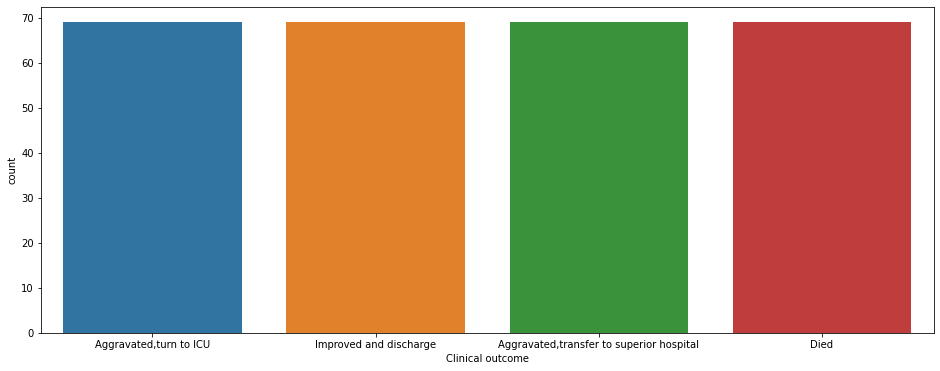

In [36]:
plt.figure(figsize=(16, 6))
sns.countplot(x="Clinical outcome", data=y)

In [0]:
X = X.values
y = y.values

# Modeling

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Logistic Regression

In [39]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0, class_weight='balanced')
# fit the model with data
logreg.fit(x_train,y_train)
y_pred_logist=logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
cnf_matrix_logist = confusion_matrix(y_test, y_pred_logist, labels=['Improved and discharge', 'Aggravated,transfer to superior hospital', 'Aggravated,turn to ICU', 'Died'])
cnf_matrix_logist

array([[14,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 12]])

Random Forests

In [41]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [42]:
cnf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc, labels=['Improved and discharge', 'Aggravated,transfer to superior hospital', 'Aggravated,turn to ICU', 'Died'])
cnf_matrix_rfc

array([[14,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 12]])

Support Vector Machines (SVM)

In [43]:
#Create a svm Classifier
clf = svm.SVC(decision_function_shape='ovo')

#Train the model using the training sets
clf.fit(x_train, y_train)

#SVC(decision_function_shape='ovo')

#Predict the response for test dataset
y_pred_clf = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
cnf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=['Improved and discharge', 'Aggravated,transfer to superior hospital', 'Aggravated,turn to ICU', 'Died'])
cnf_matrix_clf

array([[14,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 12]])

Gradient Boosting Classifier (GBC)

In [45]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
cnf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc, labels=['Improved and discharge', 'Aggravated,transfer to superior hospital', 'Aggravated,turn to ICU', 'Died'])
cnf_matrix_gbc

array([[14,  0,  0,  0],
       [ 0, 14,  0,  0],
       [ 0,  0, 16,  0],
       [ 0,  0,  0, 12]])

**Cross-Validation Implementation to avoid Overfitting**

In [0]:
seed = 42
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

Logistic Regression

In [48]:
lr = LogisticRegression(random_state=0, class_weight='balanced')
results_lr = model_selection.cross_val_score(lr, X, y, cv=kfold)

y_pred_lr = model_selection.cross_val_predict(lr, X, y, cv=kfold)
conf_mat_lr = confusion_matrix(y, y_pred_lr)
print(conf_mat_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[[69  0  0  0]
 [ 0 69  0  0]
 [ 0  0 69  0]
 [ 0  0  0 69]]


In [49]:
print(results_lr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Random Forests

In [50]:
max_features = 3
num_trees = 200

rf = RandomForestClassifier(n_estimators=num_trees)
results_rf = model_selection.cross_val_score(rf, X, y, cv=kfold)

y_pred_rf = model_selection.cross_val_predict(rf, X, y, cv=kfold)
conf_mat_rf = confusion_matrix(y, y_pred_rf)
print(conf_mat_rf)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[[69  0  0  0]
 [ 0 69  0  0]
 [ 0  0 69  0]
 [ 0  0  0 69]]


In [51]:
print(results_rf)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Support Vector Machines (SVM)

In [52]:
sv = svm.SVC(decision_function_shape='ovo')
results_sv = model_selection.cross_val_score(sv, X, y, cv=kfold)

y_pred_sv = model_selection.cross_val_predict(sv, X, y, cv=kfold)
conf_mat_sv = confusion_matrix(y, y_pred_sv)
print(conf_mat_sv)

[[69  0  0  0]
 [ 0 69  0  0]
 [ 0  0 69  0]
 [ 0  0  0 69]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [53]:
print(results_sv)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Gradient Boosting Classifier (GBC)

In [54]:
gb = GradientBoostingClassifier(random_state=0)
results_gb = model_selection.cross_val_score(gb, X, y, cv=kfold)

y_pred_gb = model_selection.cross_val_predict(gb, X, y, cv=kfold)
conf_mat_gb = confusion_matrix(y, y_pred_gb)
print(conf_mat_gb)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[[69  0  0  0]
 [ 0 69  0  0]
 [ 0  0 69  0]
 [ 0  0  0 69]]


In [55]:
print(results_gb)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Evaluation

In [0]:
#labels = ['Improved and discharge', 'Aggravated,transfer to superior hospital', 'Aggravated,turn to ICU', 'Died']
#fig = plt.figure(figsize=(16, 16))
#ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat_lr, cmap=plt.cm.Blues)
#fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()

Logistic

In [57]:
print("Accuracy:", accuracy_score(y_pred_logist, y_test))
print("Precision:", precision_score(y_pred_logist, y_test, average='macro'))
print("Recall:", recall_score(y_pred_logist, y_test, average='macro'))
print("F1 Score:", f1_score(y_pred_logist, y_test, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Random Forest

In [58]:
print("Accuracy:", accuracy_score(y_pred_rfc, y_test))
print("Precision:", precision_score(y_pred_rfc, y_test, average='macro'))
print("Recall:", recall_score(y_pred_rfc, y_test, average='macro'))
print("F1 Score:", f1_score(y_pred_rfc, y_test, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


SVM

In [59]:
print("Accuracy:", accuracy_score(y_pred_clf, y_test))
print("Precision:", precision_score(y_pred_clf, y_test, average='macro'))
print("Recall:", recall_score(y_pred_clf, y_test, average='macro'))
print("F1 Score:", f1_score(y_pred_clf, y_test, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


GBC

In [60]:
print("Accuracy:", accuracy_score(y_pred_gbc, y_test))
print("Precision:", precision_score(y_pred_gbc, y_test, average='macro'))
print("Recall:", recall_score(y_pred_gbc, y_test, average='macro'))
print("F1 Score:", f1_score(y_pred_gbc, y_test, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Conclusion